<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.868802,39.355113,-0.002912,79.221003,79.226381,-0.005378
1,0.0,1.0,20.024981,50.913149,-0.011559,80.926571,80.945491,-0.018920
2,0.0,2.0,61.385128,83.056952,-0.012879,154.429202,154.441915,-0.012713
3,0.0,3.0,72.043998,39.727048,0.001818,121.772864,121.760602,0.012262
4,0.0,4.0,45.939714,51.967152,0.030502,107.937368,107.906428,0.030940
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.890257,83.360624,-0.001821,174.249061,174.255535,-0.006474
29996,999.0,26.0,95.444523,67.359898,-0.017432,172.786988,172.807413,-0.020425
29997,999.0,27.0,89.141449,63.217922,0.018324,162.377695,162.360303,0.017392
29998,999.0,28.0,37.021946,94.703130,-0.003064,141.722013,141.725475,-0.003462


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.868802,39.355113,-0.002912,79.221003,79.226381,-0.005378
1,0.0,1.0,20.024981,50.913149,-0.011559,80.926571,80.945491,-0.018920
2,0.0,2.0,61.385128,83.056952,-0.012879,154.429202,154.441915,-0.012713
3,0.0,3.0,72.043998,39.727048,0.001818,121.772864,121.760602,0.012262
4,0.0,4.0,45.939714,51.967152,0.030502,107.937368,107.906428,0.030940
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.890257,83.360624,-0.001821,174.249061,174.255535,-0.006474
29996,999.0,26.0,95.444523,67.359898,-0.017432,172.786988,172.807413,-0.020425
29997,999.0,27.0,89.141449,63.217922,0.018324,162.377695,162.360303,0.017392
29998,999.0,28.0,37.021946,94.703130,-0.003064,141.722013,141.725475,-0.003462


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.868802  39.355113 -0.002912   79.221003   79.226381 -0.005378
      1.0    20.024981  50.913149 -0.011559   80.926571   80.945491 -0.018920
      2.0    61.385128  83.056952 -0.012879  154.429202  154.441915 -0.012713
      3.0    72.043998  39.727048  0.001818  121.772864  121.760602  0.012262
      4.0    45.939714  51.967152  0.030502  107.937368  107.906428  0.030940
...                ...        ...       ...         ...         ...       ...
999.0 25.0   80.890257  83.360624 -0.001821  174.249061  174.255535 -0.006474
      26.0   95.444523  67.359898 -0.017432  172.786988  172.807413 -0.020425
      27.0   89.141449  63.217922  0.018324  162.377695  162.360303  0.017392
      28.0   37.021946  94.703130 -0.003064  141.722013  141.725475 -0.003462
      29.0   44.080948  56.227649 -0.014859  110.293737  110.300478 -0.006741

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.868802  39.355113 -0.002912   79.221003   79.226381 -0.005378
      1.0    20.024981  50.913149 -0.011559   80.926571   80.945491 -0.018920
      2.0    61.385128  83.056952 -0.012879  154.429202  154.441915 -0.012713
      3.0    72.043998  39.727048  0.001818  121.772864  121.760602  0.012262
      4.0    45.939714  51.967152  0.030502  107.937368  107.906428  0.030940
...                ...        ...       ...         ...         ...       ...
999.0 25.0   80.890257  83.360624 -0.001821  174.249061  174.255535 -0.006474
      26.0   95.444523  67.359898 -0.017432  172.786988  172.807413 -0.020425
      27.0   89.141449  63.217922  0.018324  162.377695  162.360303  0.017392
      28.0   37.021946  94.703130 -0.003064  141.722013  141.725475 -0.003462
      29.0   44.080948  56.227649 -0.014859  110.293737  110.300478 -0.006741

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.868802,39.355113,-0.002912,79.221003,79.226381,-0.005378
1,0.0,1.0,20.024981,50.913149,-0.011559,80.926571,80.945491,-0.018920
2,0.0,2.0,61.385128,83.056952,-0.012879,154.429202,154.441915,-0.012713
3,0.0,3.0,72.043998,39.727048,0.001818,121.772864,121.760602,0.012262
4,0.0,4.0,45.939714,51.967152,0.030502,107.937368,107.906428,0.030940
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.890257,83.360624,-0.001821,174.249061,174.255535,-0.006474
29996,999.0,26.0,95.444523,67.359898,-0.017432,172.786988,172.807413,-0.020425
29997,999.0,27.0,89.141449,63.217922,0.018324,162.377695,162.360303,0.017392
29998,999.0,28.0,37.021946,94.703130,-0.003064,141.722013,141.725475,-0.003462


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.868802  39.355113 -0.002912   79.221003   79.226381 -0.005378
      1.0    20.024981  50.913149 -0.011559   80.926571   80.945491 -0.018920
      2.0    61.385128  83.056952 -0.012879  154.429202  154.441915 -0.012713
      3.0    72.043998  39.727048  0.001818  121.772864  121.760602  0.012262
      4.0    45.939714  51.967152  0.030502  107.937368  107.906428  0.030940
...                ...        ...       ...         ...         ...       ...
999.0 25.0   80.890257  83.360624 -0.001821  174.249061  174.255535 -0.006474
      26.0   95.444523  67.359898 -0.017432  172.786988  172.807413 -0.020425
      27.0   89.141449  63.217922  0.018324  162.377695  162.360303  0.017392
      28.0   37.021946  94.703130 -0.003064  141.722013  141.725475 -0.003462
      29.0   44.080948  56.227649 -0.014859  110.293737  110.300478 -0.006741

[30000 rows x 6 columns]

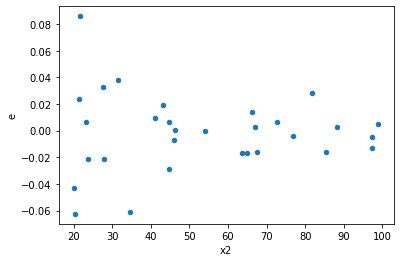

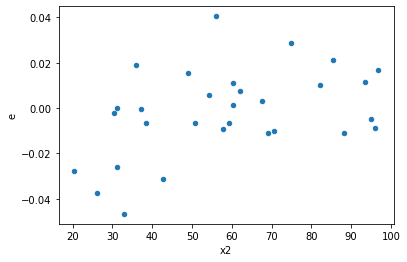

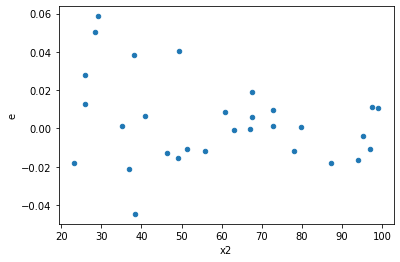

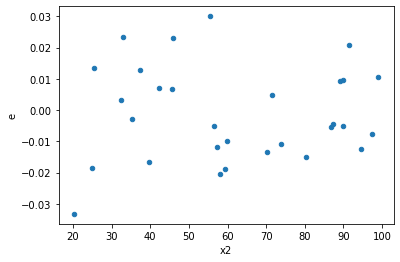

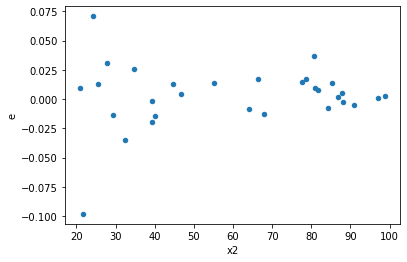

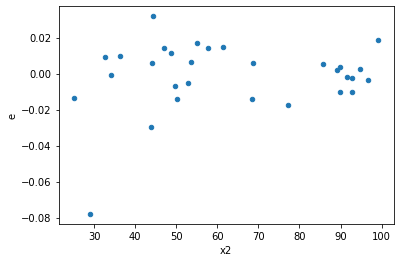

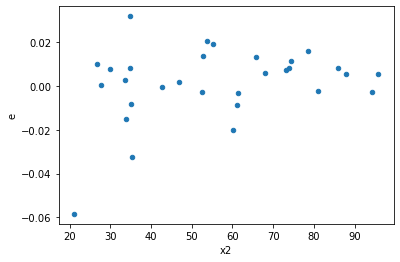

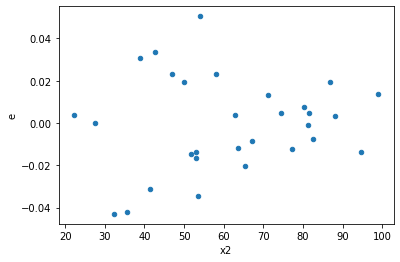

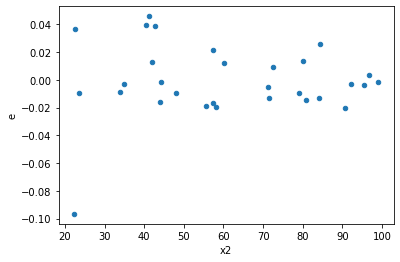

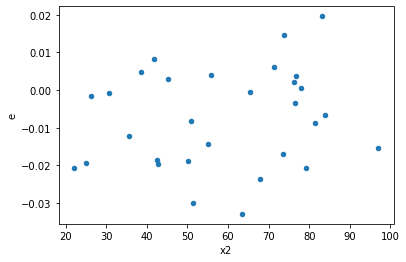

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
19.0,10.0,10.0,0.0013060567770002336,0.0021216566741834426,0.00013060567770002335,0.00021216566741834425,1.624475069955602,0.45644874767470833,0.7717756261626458,0.22822437383735417,Reject005=1 : Homoscedasticity
36.0,10.0,10.0,0.0015032404460704849,0.003621487564848693,0.0001503240446070485,0.0003621487564848693,2.409120626254681,0.18168910401609284,0.9091554479919536,0.09084455200804642,Reject005=1 : Homoscedasticity
43.0,10.0,10.0,0.0015501697685513084,0.002689417763811802,0.00015501697685513084,0.0002689417763811802,1.7349182124259612,0.3983759046748232,0.8008120476625884,0.1991879523374116,Reject005=1 : Homoscedasticity
76.0,10.0,10.0,0.00203767656385523,0.002498759129407318,0.000203767656385523,0.0002498759129407318,1.2262785830346559,0.753284180397146,0.623357909801427,0.376642090198573,Reject005=1 : Homoscedasticity
168.0,10.0,10.0,0.0033982219129448793,0.009452415540588422,0.00033982219129448794,0.0009452415540588422,2.7815768901322317,0.12210564594682483,0.9389471770265876,0.06105282297341241,Reject005=1 : Homoscedasticity
184.0,10.0,10.0,0.001963063214020494,0.0026122428529328995,0.0001963063214020494,0.00026122428529329,1.3306972665352121,0.6600279322564151,0.6699860338717925,0.33001396612820755,Reject005=1 : Homoscedasticity
213.0,10.0,10.0,0.0007412660068719347,0.0010699269740104505,7.412660068719347e-05,0.00010699269740104506,1.4433779022532423,0.5724697606178784,0.7137651196910608,0.2862348803089392,Reject005=1 : Homoscedasticity
215.0,10.0,10.0,0.004519687767841485,0.005641847709710775,0.0004519687767841485,0.0005641847709710775,1.2482826247099832,0.7326042410721194,0.6336978794639403,0.3663021205360597,Reject005=1 : Homoscedasticity
217.0,10.0,10.0,0.0023613389218692456,0.003051545731003223,0.00023613389218692457,0.00030515457310032227,1.2922946819457863,0.6929054315129861,0.6535472842435069,0.34645271575649306,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.01275583884690306,0.0008585810592894403,0.001275583884690306,8.585810592894403e-05,0.06730886691139813,0.0002026567198803565,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,0.004904409100234169,0.0024266881987331872,0.000490440910023417,0.00024266881987331873,0.4947972628582964,0.28261147554490845,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,0.008155080125783313,0.001286973863010659,0.0008155080125783313,0.00012869738630106592,0.15781253441541662,0.007340178499994994,Reject005=0 : Heteroscedasticity
3.0,10.0,10.0,0.005818879970394262,0.004218508927069303,0.0005818879970394262,0.00042185089270693033,0.7249692292215258,0.6206247289238364,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,0.003449859420672151,0.0013145252529479271,0.0003449859420672151,0.00013145252529479272,0.38103733881765317,0.143948781527837,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,0.007413703960130409,0.0007889495411735853,0.0007413703960130409,7.889495411735853e-05,0.10641772930459817,0.0014869998977580512,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,0.002027256883324835,0.0015869559305003334,0.0002027256883324835,0.00015869559305003333,0.7828094917589432,0.7060505875082221,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,0.005795742895499214,0.0008810300547707603,0.0005795742895499214,8.810300547707603e-05,0.15201330884690206,0.006343210802057008,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,0.007693649177272572,0.0031122492444514154,0.0007693649177272572,0.00031122492444514156,0.4045218559802749,0.16958220911409988,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      516
Reject005=0 : Heteroscedasticity    484
Name: Result_test, dtype: int64